In [1]:
# Partially taken from: 
# https://stats.nba.com/players/traditional/?PerMode=Totals&dir=-1&sort=PTS&Season=2019-20&SeasonType=Regular%20Season
# http://www.espn.com/nba/salaries

# https://github.com/jacobpad/jacobpad.github.io/blob/master/data/U2_Project_NBA.ipynb

# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import nba_api
from nba_api import stats
from nba_api.stats import static
from nba_api.stats.static import players
from nba_api.stats import endpoints
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import commonplayerinfo
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Get all the active players
all_active_players = players.get_active_players()
# See one specific player - the first active
print(all_active_players[0])

{'id': 203500, 'full_name': 'Steven Adams', 'first_name': 'Steven', 'last_name': 'Adams', 'is_active': True}


In [3]:
# See all players
print(all_active_players)

[{'id': 203500, 'full_name': 'Steven Adams', 'first_name': 'Steven', 'last_name': 'Adams', 'is_active': True}, {'id': 1628389, 'full_name': 'Bam Adebayo', 'first_name': 'Bam', 'last_name': 'Adebayo', 'is_active': True}, {'id': 200746, 'full_name': 'LaMarcus Aldridge', 'first_name': 'LaMarcus', 'last_name': 'Aldridge', 'is_active': True}, {'id': 1629734, 'full_name': 'Kyle Alexander', 'first_name': 'Kyle', 'last_name': 'Alexander', 'is_active': True}, {'id': 1629638, 'full_name': 'Nickeil Alexander-Walker', 'first_name': 'Nickeil', 'last_name': 'Alexander-Walker', 'is_active': True}, {'id': 1628960, 'full_name': 'Grayson Allen', 'first_name': 'Grayson', 'last_name': 'Allen', 'is_active': True}, {'id': 1628386, 'full_name': 'Jarrett Allen', 'first_name': 'Jarrett', 'last_name': 'Allen', 'is_active': True}, {'id': 1628443, 'full_name': 'Kadeem Allen', 'first_name': 'Kadeem', 'last_name': 'Allen', 'is_active': True}, {'id': 202329, 'full_name': 'Al-Farouq Aminu', 'first_name': 'Al-Farouq',

In [4]:
# Make all players a DF
df = pd.DataFrame.from_dict(all_active_players)
df.shape

(519, 5)

In [5]:
# Bring in the salary DF for merging
url = 'https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/data/2019_2020_nba_records.csv'
col_headers_for_salary_rank = ['salary_rank', 'full_name', 'position', 'team',
                               'salary']
df_salary_rank = pd.read_csv(url, # Calls CSV at above URL
                            header=None, # Eliminates col headers
                            names=col_headers_for_salary_rank) # Set col headers
df_salary_rank = df_salary_rank.drop(index=0, # Drops original col headers
                                     axis=0)
df_salary_rank = df_salary_rank.reset_index()
df_salary_rank.shape

(517, 6)

In [6]:
# Merge the DF's together
df_merged = pd.merge(df_salary_rank, df, on='full_name', how='inner')
df = df_merged
df.shape

(443, 10)

In [7]:
df.head(2)

,index,salary_rank,full_name,position,team,salary,id,first_name,last_name,is_active
0,1,1,Stephen Curry,PG,Golden State Warriors,"$40,231,758",201939,Stephen,Curry,True
1,2,2,Chris Paul,PG,Oklahoma City Thunder,"$38,506,482",101108,Chris,Paul,True


In [8]:
# Check if I have any null values
df.isnull().sum()

index          0
salary_rank    0
full_name      0
position       0
team           0
salary         0
id             0
first_name     0
last_name      0
is_active      0
dtype: int64

In [9]:
# Drop the is_active column
df = df.drop('is_active', axis=1)
df.shape

(443, 9)

In [10]:
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################

###### Not quite sure why the api isn't letting me work with it the way I'd expect to.

In [11]:
# stats_of_players = shotchartdetail.ShotChartDetail.player_stats()
# stats_of_players

In [12]:
# custom_headers = {
#     'Host': 'stats.nba.com',
#     'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'
# }

# player_stats = shotchartdetail.ShotChartDetail.(player_id=201939, 
#                                                headers=custom_headers, 
#                                                team_id=)
# player_stats

In [13]:
# player_stats = shotchartdetail.ShotChartDetail.
# player_stats

In [14]:
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
##############################################################################################
col_headers_for_general_stats = ['full_name', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN_PLAYED', 'PTS', 'FGM', 'FGA',
       'FG_PERCENT', 'x_3PM', 'x_3PA', 'x_3P_PERCENT', 'FTM', 'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', 'plus_minus']
general_stats = pd.read_csv('https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/data/nba_player_general_stats_2019-2020.csv',
                           header = None,
                           names = col_headers_for_general_stats)
general_stats = general_stats.drop(index=0, axis=0)
general_stats = general_stats.reset_index()

general_stats

,index,full_name,TEAM,AGE,GP,W,L,MIN_PLAYED,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,plus_minus
0,1,James Harden,HOU,30,53,35,18,1958,1867,536,...,341,391,233,88,52,180,3049.7,18,3,273
1,2,Damian Lillard,POR,29,54,25,29,1996,1594,507,...,235,429,158,52,18,91,2571.5,16,1,47
2,3,Trae Young,ATL,21,52,15,37,1840,1558,481,...,228,477,255,60,6,89,2490.1,22,2,-205
3,4,Giannis Antetokounmpo,MIL,25,50,43,7,1543,1502,554,...,679,292,182,55,53,155,2896.8,45,4,556
4,5,Zach LaVine,CHI,24,58,20,38,2009,1463,510,...,281,243,200,86,28,122,2306.7,2,0,-183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,Quinndary Weatherspoon,SAS,23,1,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,-3
454,455,Stanton Kidd,UTA,27,4,3,1,15,0,0,...,3,1,2,0,0,3,3.1,0,0,-1
455,456,Talen Horton-Tucker,LAL,19,2,1,1,5,0,0,...,0,2,0,1,0,0,6,0,0,-7
456,457,Vic Law,ORL,24,3,0,3,4,0,0,...,0,0,0,0,0,0,0,0,0,3


In [15]:
# Merge the DF's together
df_merged = pd.merge(df, general_stats, on='full_name', how='inner')
df_merged.shape

(390, 38)

In [16]:
df = df_merged
df.shape

(390, 38)

In [17]:
# I want: full team name, 
#         drop index_x col,
#         drop index_y col,
#         change id to player_id,
#         names, TEAM

In [18]:
df.drop(['index_x', 'index_y', 'salary_rank', 'full_name','id','first_name','last_name','plus_minus','TEAM'], 
        axis=1, inplace=True)
df.head(1)

,position,team,salary,AGE,GP,W,L,MIN_PLAYED,PTS,FGM,...,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3
0,PG,Golden State Warriors,"$40,231,758",31,4,1,3,112,81,27,...,16,20,26,15,5,2,10,150,1,0


In [19]:
# Check if I have any null values
# df.isnull().sum()

In [20]:
# What's going on with the extra space?
df['salary'].max()

'$9,881,598 '

In [21]:
# Make the salary a number
df['salary'] = df['salary'].str.replace('$','')
df['salary'] = df['salary'].str.replace(',','')
df['salary'] = df['salary'].str.replace(' ','')
df.head(1)

,position,team,salary,AGE,GP,W,L,MIN_PLAYED,PTS,FGM,...,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3
0,PG,Golden State Warriors,40231758,31,4,1,3,112,81,27,...,16,20,26,15,5,2,10,150,1,0


In [22]:
# Get column names to ...
df.columns

Index(['position', 'team', 'salary', 'AGE', 'GP', 'W', 'L', 'MIN_PLAYED',
       'PTS', 'FGM', 'FGA', 'FG_PERCENT', 'x_3PM', 'x_3PA', 'x_3P_PERCENT',
       'FTM', 'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'PF', 'FP', 'DD2', 'TD3'],
      dtype='object')

In [45]:
# Convert all number columns to actual numbers... int or float
df['salary'] = df.salary.astype(int)
df['AGE'] = df.AGE.astype(int)
df['W'] = df.W.astype(int)
df['L'] = df.L.astype(int)
df['BLK'] = df.BLK.astype(int)
df['STL'] = df.STL.astype(int)
df['TOV'] = df.TOV.astype(int)
df['AST'] = df.AST.astype(int)
df['REB'] = df.REB.astype(int)
df['DREB'] = df.DREB.astype(int)
df['OREB'] = df.OREB.astype(int)
df['GP'] = df.GP.astype(int)
df['MIN_PLAYED'] = df.MIN_PLAYED.astype(int)
df['PTS'] = df.PTS.astype(int)
df['FGM'] = df.FGM.astype(int)
df['FGA'] = df.FGA.astype(int)
df['x_3PM'] = df.x_3PM.astype(int)
df['x_3PA'] = df.x_3PA.astype(int)
df['FG_PERCENT'] = df.FG_PERCENT.astype(float)
df['x_3P_PERCENT'] = df.x_3P_PERCENT.astype(float)
df['FTM'] = df.FTM.astype(int)
df['FTA'] = df.FTA.astype(int)
df['PF'] = df.PF.astype(int)
df['FP'] = df.FP.astype(float)
df['x_3PA'] = df.x_3PA.astype(int)
df['DD2'] = df.DD2.astype(int)
df['TD3'] = df.TD3.astype(int)
df['FT_PERCENT'] = df.FT_PERCENT.astype(float)

In [46]:
# Check the work outcome of what I just did
df.dtypes

position         object
team             object
salary            int64
AGE               int64
GP                int64
W                 int64
L                 int64
MIN_PLAYED        int64
PTS               int64
FGM               int64
FGA               int64
FG_PERCENT      float64
x_3PM             int64
x_3PA             int64
x_3P_PERCENT    float64
FTM               int64
FTA               int64
FT_PERCENT      float64
OREB              int64
DREB              int64
REB               int64
AST               int64
TOV               int64
STL               int64
BLK               int64
PF                int64
FP              float64
DD2               int64
TD3               int64
dtype: object

## Begin some visual exploration

In [26]:
# Get Pandas Profiling Report
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

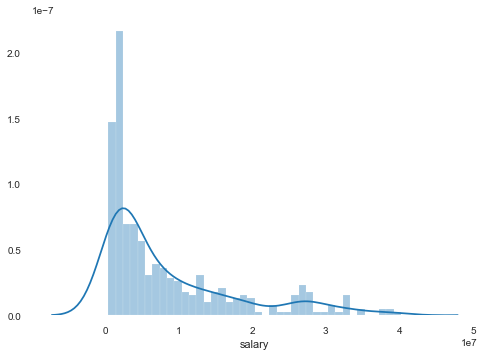

In [50]:
# See the salary
sns.distplot(df['salary'], bins=40);

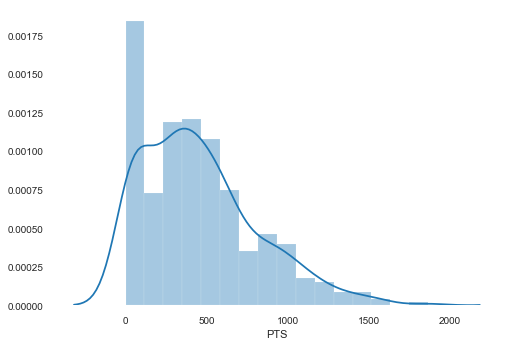

In [51]:
# See points
sns.distplot(df['PTS']);

In [29]:
# Takes way too long! & It's way too small!
# sns.pairplot(df);

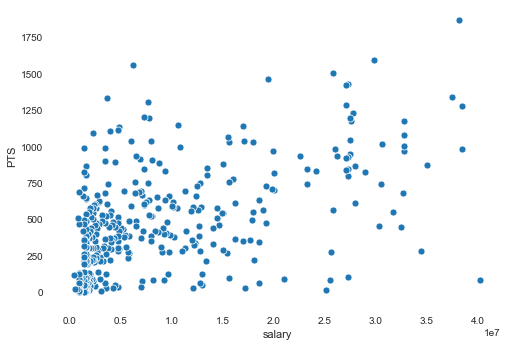

In [52]:
# Salary & PTS
sns.scatterplot(df['salary'],df['PTS']);

In [53]:
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################

In [54]:
# Same as above, but this is flipped
px.scatter(df,x='PTS',y='salary', trendline='ols')

In [55]:
# Points and minutes played
px.scatter(df,x='PTS',y='MIN_PLAYED', trendline='ols')

In [56]:
# Minutes played and salary
px.scatter(df,x='MIN_PLAYED',y='salary', trendline='ols')

# My NBA Salary Regression Predictions

## Choose Target

In [35]:
target = df['salary']

## Choose Evaluation Metric

* ### Accuracy, Precision, and Recall!

In [36]:

train, val = train_test_split(df, random_state=24)
print('Train:',train.shape)
print('Val:',val.shape)
# test.shape

Train: (292, 29)
Val: (98, 29)


In [37]:
target = 'salary'
y_train = train[target]
y_train.value_counts(normalize=True)

898310      0.058219
1416852     0.054795
1620564     0.054795
4767000     0.023973
1618520     0.013699
              ...   
2321735     0.003425
1419138     0.003425
16200000    0.003425
2329200     0.003425
2689920     0.003425
Name: salary, Length: 204, dtype: float64

## Baseline

## Fits & Evaluates Any Linear Model For Regression

## Fits & Evaluates A Decision Tree, Random Forest, Or Gradient Boosting Model For Regression

## Student writes 300+ words: Student reports baseline score, validation scores from 2+ models, and test score from 1 selected model

## Student makes 3+ visualizations to explore their data and explain their models

In [38]:
##############################################################################
# Machine Learning Tutorial Python - 3: Linear Regression Multiple Variables #
# https://www.youtube.com/watch?v=J_LnPL3Qg70                                #
##############################################################################
model = LinearRegression()
model.fit(df[['AGE', 'W', 'L', 'MIN_PLAYED', 'PTS']],df['salary'])
model.predict([[25,30,2,1500,1111]])

array([22137707.91316099])

In [39]:
model.coef_

array([ 820350.49076672, -280468.9384249 , -261664.57265836,
          3640.35636659,   15979.63262587])

In [40]:
model.intercept_

-12647563.455178408

In [41]:
df.dtypes

position         object
team             object
salary            int64
AGE               int64
GP                int64
W                 int64
L                 int64
MIN_PLAYED        int64
PTS               int64
FGM               int64
FGA               int64
FG_PERCENT      float64
x_3PM             int64
x_3PA             int64
x_3P_PERCENT    float64
FTM               int64
FTA               int64
FT_PERCENT      float64
OREB              int64
DREB              int64
REB               int64
AST               int64
TOV               int64
STL               int64
BLK               int64
PF                int64
FP              float64
DD2               int64
TD3               int64
dtype: object

In [42]:
# Linear Regression with just points (PTS)
# 1. Import the appropriate estimator class from Scikit-Learn # DONE UP TOP
# 2. Instantiate this class
model = LinearRegression()
# 3. Arrange X features matrix & y target vector
features = ['PTS']
target = 'salary'
X_train = df[features]
y_train = df[target]
# 4. Fit the model
model.fit(X_train, y_train)
# 5. Apply the model to new data
points = 1497
X_test = [[points]]
y_pred = model.predict(X_test)
y_pred

array([23082757.66052453])

In [43]:
# Check for the mean_absolute_error of 1867 PTS
y_test = [1036]
mae = mean_absolute_error(y_test, y_pred)
print(f"Our model's error: ${mae:,.0f}")

Our model's error: $23,081,722


In [44]:
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################